<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/DL/2348513_deyon_cia2_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**First question**


Importing library numpy

In [ ]:
import numpy as np

1.Defining the revenue function f(w) and the shipping cost function g(w)

In [ ]:
def revenue(w):
    return -0.2 * w**2 + 50 * w - 200
def shipping_cost(w):
    return 0.1 * w**2 - 10 * w + 100


2.Defining the objective function h(w) as the difference between revenue and shipping cost

In [ ]:
def objective_function(w):
    return revenue(w) - shipping_cost(w)

3.Defining the gradient of the objective function

In [ ]:
def gradient(w):
    return -0.6 * w + 60

**Momentum-based optimization algorithm**

In [72]:
# Definig momentum based optimization algorithm
def momentum_optimization(w0, learning_rate, momentum_term, num_iterations):
# Initial price
    w = w0
# Initialize velocity
    v = 0
    for i in range(num_iterations):
        grad = gradient(w)
         # Update velocity with momentum
        v = momentum_term * v - learning_rate * grad
        # Update price with velocity
        w += v
    return w

In [68]:
# Parameters

initial_price = 100 # Initial price
# Learning rate
learning_rate = 0.01
# Momentum term
momentum = 0.9
# Number of iterations
iterations = 1000

In [70]:
# Finding the optimal price
optimal_price = momentum_optimization(initial_price, learning_rate, momentum, iterations)

In [71]:
# Calculating revenue and shipping cost at the optimal price
optimal_revenue = revenue(optimal_price)
optimal_shipping_cost = shipping_cost(optimal_price)

print("Optimal Price:", optimal_price)
print("Optimal Revenue:", optimal_revenue)
print("Optimal Shipping Cost:", optimal_shipping_cost)
print("Net Profit:", optimal_revenue - optimal_shipping_cost)


Optimal Price: 100.0
Optimal Revenue: 2800.0
Optimal Shipping Cost: 100.0
Net Profit: 2700.0


**Second question**


Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1, l2, l1_l2




Loading the dataset

In [ ]:
df=pd.read_csv('/content/winequality_dataset.csv')

In [ ]:
df.shape

(1599, 12)

Finding if there is any missing value is present

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No missing value in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Selecting quality as target and remaining as predictors
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
# using standard scaler tandardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Defining a function for building model with different regularization technique
def build_model(regularizer):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizer),
        Dense(512, activation='relu', kernel_regularizer=regularizer),
        Dense(512, activation='relu', kernel_regularizer=regularizer),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

Training and evaluation for L1 Regularization

In [ ]:
model_l1 = build_model(l1(0.01))
history_l1 = model_l1.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_l1, test_mae_l1 = model_l1.evaluate(X_test_scaled, y_test)
print("Test Loss with L1 Regularization:", test_loss_l1)
print("Test mean absolute error with L1 Regularization is:", test_mae_l1)

13/13 [==============================] - 0s 9ms/step - loss: 5.8242 - mae: 0.5686
Test Loss with L1 Regularization: 5.82415771484375
Test mean absolute error with L1 Regularization is: 0.568620502948761


Training and evaluation for L2 Regularization

In [ ]:
model_l2 = build_model(l2(0.01))
history_l2 = model_l2.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_l2, test_mae_l2 = model_l2.evaluate(X_test_scaled, y_test)
print("Test Loss with L2 Regularization:", test_loss_l2)
print("Test mean absolute error with L2 Regularization:", test_mae_l2)


13/13 [==============================] - 0s 3ms/step - loss: 3.6705 - mae: 0.5380
Test Loss with L2 Regularization: 3.6705362796783447
Test mean absolute error with L2 Regularization: 0.5380264520645142


Training and evaluation for Elastic Net Regularization

In [ ]:
model_elastic_net = build_model(l1_l2(l1=0.01, l2=0.01))
history_elastic_net = model_elastic_net.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_elastic_net, test_mae_elastic_net = model_elastic_net.evaluate(X_test_scaled, y_test)
print("Test Loss with Elastic Net Regularization:", test_loss_elastic_net)
print("Test  mean absolute error with Elastic Net Regularization:", test_mae_elastic_net)

13/13 [==============================] - 0s 7ms/step - loss: 5.1590 - mae: 0.5606
Test Loss with Elastic Net Regularization: 5.158984184265137
Test  mean absolute error with Elastic Net Regularization: 0.5606420040130615


Training and evaluation for Dropout Regularization

In [ ]:
model_dropout = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1)
])
model_dropout.compile(optimizer='adam', loss='mse', metrics=['mae'])
history_dropout = model_dropout.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_test_scaled, y_test), verbose=0)
test_loss_dropout, test_mae_dropout = model_dropout.evaluate(X_test_scaled, y_test)
print("Test Loss with Dropout Regularization:", test_loss_dropout)
print("Test mean absolute error with Dropout Regularization:", test_mae_dropout)

13/13 [==============================] - 0s 3ms/step - loss: 0.7828 - mae: 0.7105
Test Loss with Dropout Regularization: 0.7828086018562317
Test mean absolute error with Dropout Regularization: 0.7105465531349182


Visualization

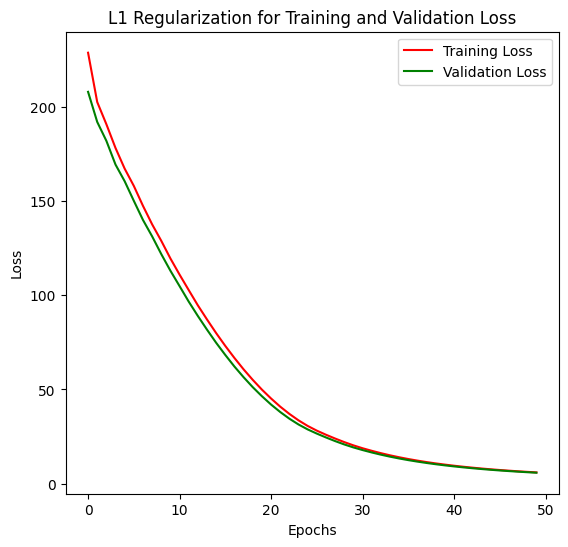

In [ ]:
# Ploting the loss for L1 Regularization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history_l1.history['loss'], label='Training Loss', color='red')
plt.plot(history_l1.history['val_loss'], label='Validation Loss', color='green')
plt.title('L1 Regularization for Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


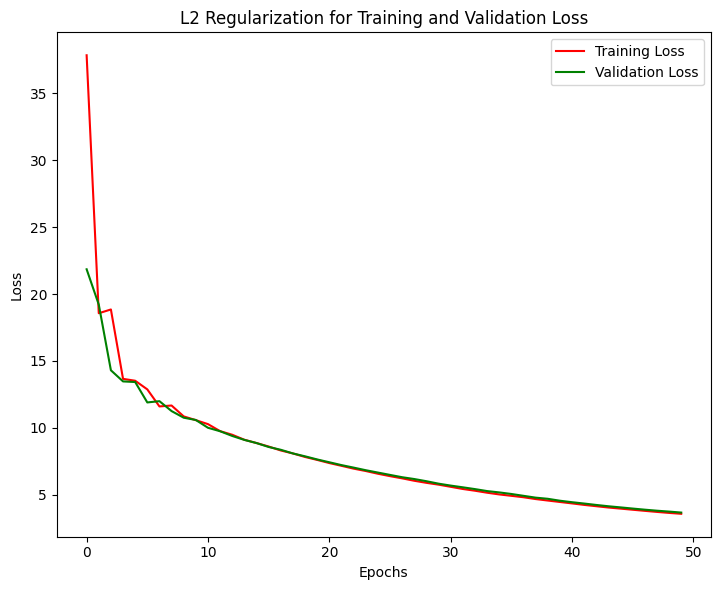

In [ ]:
# Ploting the loss for L2 Regularization
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.plot(history_l2.history['loss'], label='Training Loss',color='red')
plt.plot(history_l2.history['val_loss'], label='Validation Loss',color='green')
plt.title('L2 Regularization for Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

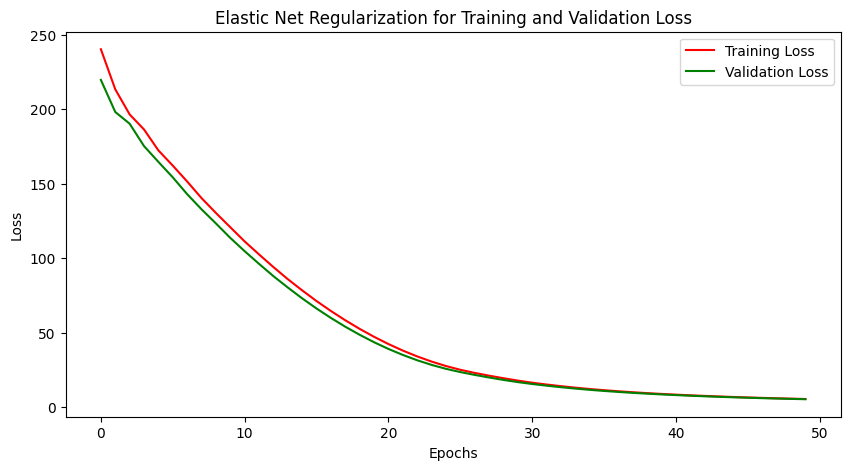

In [ ]:
# Ploting loss for Elastic Net Regularization
plt.figure(figsize=(10, 5))
plt.plot(history_elastic_net.history['loss'], label='Training Loss',color='red')
plt.plot(history_elastic_net.history['val_loss'], label='Validation Loss',color='green')
plt.title('Elastic Net Regularization for Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

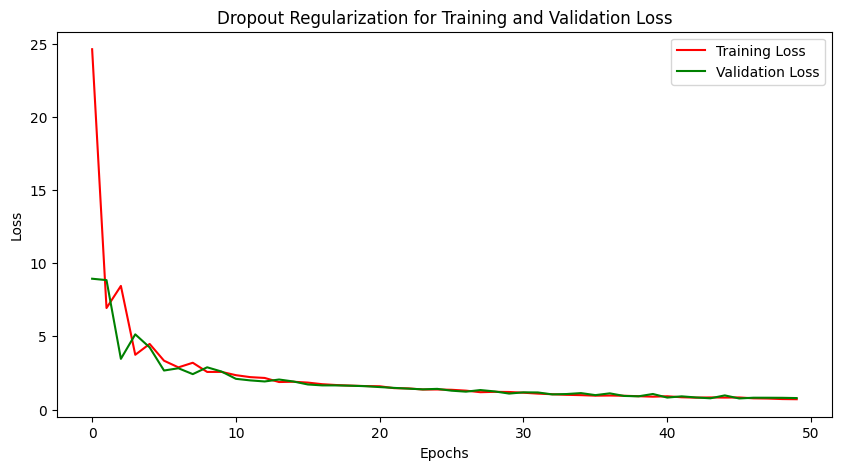

In [ ]:
# Ploting loss for Dropout Regularization
plt.figure(figsize=(10, 5))
plt.plot(history_dropout.history['loss'], label='Training Loss',color='red')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss',color='green')
plt.title('Dropout Regularization for Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

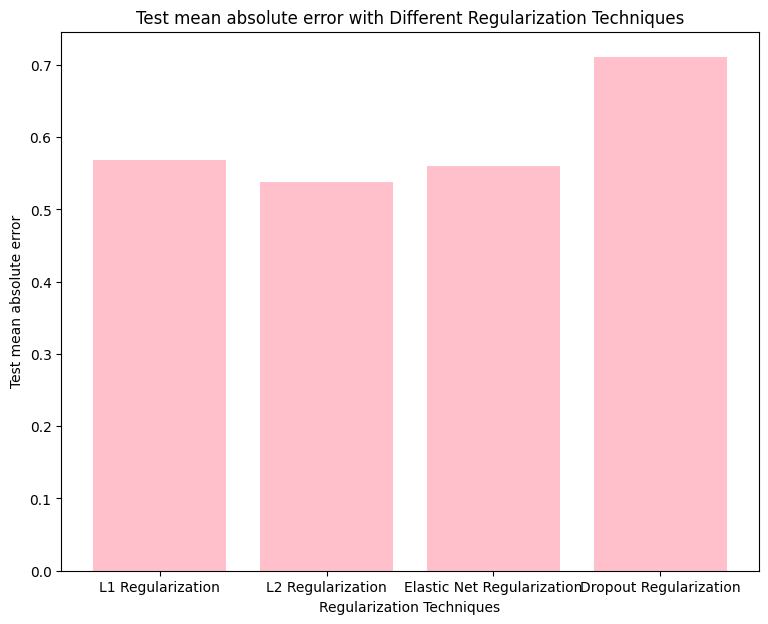

In [ ]:
# Comparing the mean absolute error of L1 Regularization, L2 Regularization, Elastic Net Regularization and Dropout Regularization
plt.figure(figsize=(9,7))
techniques = ['L1 Regularization', 'L2 Regularization', 'Elastic Net Regularization', 'Dropout Regularization']
test_maes = [test_mae_l1, test_mae_l2, test_mae_elastic_net, test_mae_dropout]
plt.bar(techniques, test_maes, color='pink')
plt.title('Test mean absolute error with Different Regularization Techniques')
plt.xlabel('Regularization Techniques')
plt.ylabel('Test mean absolute error')
plt.show()

From the above graph  L2 regularization is the best model comparing all the other model  in terms of both test loss and test mean absolute error, then  Elastic Net regularization,L1 regularization and last dropout regularization.

Comparing to all model dropout regularization performannce relatively very low
